In [68]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

from gsp_neuro import data_loading as dload 
from gsp_neuro import utils as ut
from gsp_neuro import plotting as viz
from gsp_neuro.brain import Brain

In [2]:
data_base_directory = "/Users/hugofluhr/chuv/data/"

In [7]:
subject_ids = dload.get_subjects(data_base_directory)

In [54]:
#subject = 'consensus'
subject = subject_ids[0]
scale = 2

In [55]:
brain = Brain(data_base_directory, subject, scale)

In [70]:
brain.load_graph(lap_type = 'normalized')
N = brain.G.N

In [96]:
def spectral_clustering(brain, n_eigen, k):
    U = brain.G.U[:,:n_eigen]
    kmeans = KMeans(n_clusters=k).fit(U)
    return kmeans.labels_

In [97]:
def compute_modularity(brain, labels):

    A = brain.adjacency
    N = A.shape[0]
    k = np.sum(A,1)
    m = np.sum(A)/2

    Q = 0
    for i in np.arange(N):
        for j in np.arange(i+1,N):
            Q += (A[i,j] - (k[i]*k[j])/(2*m)) * int(labels[i]==labels[j])
    return Q/m

In [103]:
clusters = spectral_clustering(brain, 2, 2)
compute_modularity(brain, clusters)

0.49594939977644625

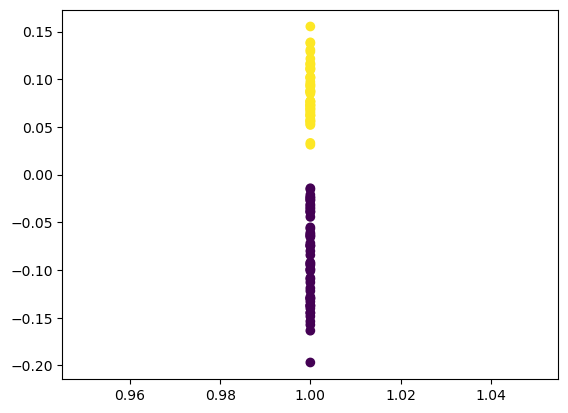

In [91]:
plt.scatter(np.ones((N,)),brain.G.U[:,1],c=clusters)
plt.show()

In [92]:
clusters = spectral_clustering(brain,3)

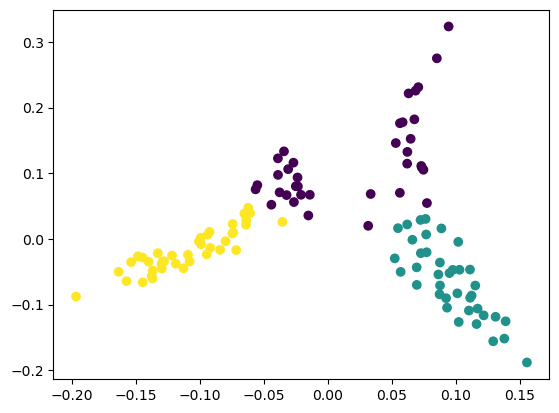

In [84]:
plt.scatter(brain.G.U[:,1], brain.G.U[:,2], c = clusters)
plt.show()